In [22]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
import numpy as np

In [38]:
digits = datasets.load_digits()
data = digits.images.reshape(len(digits.images), -1)
label = digits.target.reshape(len(digits.images, ))
data.shape

(1797, 64)

In [26]:
import matplotlib.image as mpimg
path = "/home/gasai/github/projects/ml_perseptron"
image = []
for i in range(20):
    image.append(mpimg.imread(path + "/" + str(i + 1) + "percent.png"))
image = np.array(image)
image.shape

(20, 8, 8, 3)

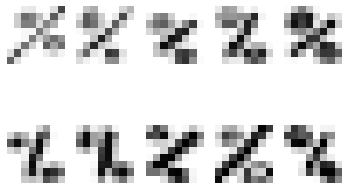

In [34]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.axis("off")
    plt.imshow(image[i], cmap=plt.cm.gray_r, interpolation="nearest")

In [72]:
image_gray = [(16 - img[:, :, 0] * 16).astype(int) for img in image]
image_gray = np.array(image_gray)
image_gray.shape

(20, 8, 8)

In [75]:
for i in range(20):
    data = np.append(data, image_gray[i].reshape(1, 64), axis=0)

In [76]:
data.shape

(1817, 64)

In [88]:
# 25 hex - код %
percents = np.array([0x25 for i in range(20)])
label = np.append(label, percents) 
label.shape

(1817,)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, label, test_size=0.3, random_state=1)

In [90]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 64) (546, 64) (1271,) (546,)


In [96]:
mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=100, alpha=1e-4,solver='sgd', 
                    verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

In [97]:
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 8.04089963
Iteration 2, loss = 2.04969616
Iteration 3, loss = 1.75141382
Iteration 4, loss = 1.47903017
Iteration 5, loss = 1.22287062
Iteration 6, loss = 1.16748940
Iteration 7, loss = 0.93678554
Iteration 8, loss = 0.76950616
Iteration 9, loss = 0.66456481
Iteration 10, loss = 0.56654937
Iteration 11, loss = 0.47682325
Iteration 12, loss = 0.42105540
Iteration 13, loss = 0.42563666
Iteration 14, loss = 0.33577493
Iteration 15, loss = 0.29785589
Iteration 16, loss = 0.25017534
Iteration 17, loss = 0.23565902
Iteration 18, loss = 0.20389219
Iteration 19, loss = 0.19977567
Iteration 20, loss = 0.19537403
Iteration 21, loss = 0.18476565
Iteration 22, loss = 0.15953053
Iteration 23, loss = 0.16567605
Iteration 24, loss = 0.14895597
Iteration 25, loss = 0.15583402
Iteration 26, loss = 0.13562212
Iteration 27, loss = 0.12273472
Iteration 28, loss = 0.11064725
Iteration 29, loss = 0.11424185
Iteration 30, loss = 0.11157872
Iteration 31, loss = 0.09668895
Iteration 32, los

/home/gasai/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [99]:
mlp.coefs_

[array([[-0.03806794,  0.09459415, -0.19320274, ..., -0.09323334,
         -0.09736263, -0.16973236],
        [-0.21999366,  0.02852764,  0.02126174, ..., -0.01411945,
         -0.23445494,  0.05247648],
        [-0.07210999, -0.28486504,  0.12070496, ..., -0.57670993,
         -0.1553996 , -0.23834517],
        ...,
        [-0.26135647, -0.17568801, -0.16787208, ..., -0.59877714,
          0.14829952, -0.02970088],
        [-0.15721189, -0.30936718, -0.28825471, ..., -0.25595998,
         -0.05366006, -0.06276573],
        [-0.17319877, -0.03407154,  0.30086589, ...,  0.13875508,
          0.00119073,  0.17050748]]),
 array([[ 8.55634894e-02,  1.20529682e-01,  2.47625751e-01,
          1.77371550e-01,  1.13795399e-01,  2.95128640e-02,
         -1.41691199e-01,  9.84235417e-02,  1.73962745e-01,
          2.55702051e-01,  2.58586788e-01],
        [ 3.50129731e-01, -1.42646868e-01, -6.85928053e-02,
         -1.07243326e-01,  1.85422044e-01, -2.32558459e-01,
          4.15480818e-01,  1.

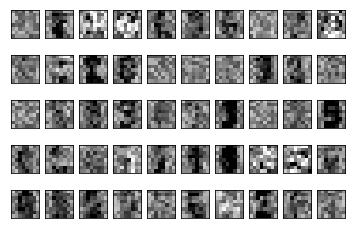

In [101]:
fig, axes = plt.subplots(5,10)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8,8), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

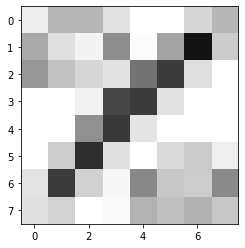

In [121]:
image = mpimg.imread(
    "/home/gasai/github/projects/ml_perseptron/test_percent.png")
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [122]:
image_gray = (16 - image[:, :, 0] * 16).astype(int)
image_gray.shape

(8, 8)

In [123]:
prediction = mlp.predict(image_gray.reshape(1, 64))
print("Это символ - " + chr(prediction[0]))

Это символ - %


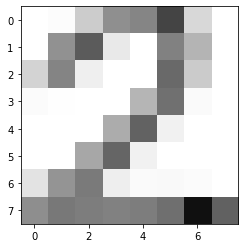

In [106]:
image = mpimg.imread(
    "/home/gasai/github/projects/ml_perseptron/test_2.png")
plt.imshow(image, cmap=plt.get_cmap("gray"))


In [107]:
image_gray = (16 - image[:, :, 0] * 16).astype(int)
prediction = mlp.predict(image_gray.reshape(1, 64))
print("Это символ - " + str(prediction[0]))

Это символ - 2
